In [ ]:


from google.colab import files
uploaded = files.upload()


import pandas as pd
df=pd.read_csv('netflix_customer_churn.csv')
df.head()

Saving netflix_customer_churn.csv to netflix_customer_churn.csv


,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
import numpy as np
print("Dataset shape:", df.shape)

df.isnull().sum()


df['favorite_genre'].fillna('Unknown', inplace=True)
df['payment_method'].fillna(df['payment_method'].mode()[0], inplace=True)
df['watch_hours'].fillna(df['watch_hours'].median(), inplace=True)
df['avg_watch_time_per_day'].fillna(df['avg_watch_time_per_day'].median(), inplace=True)






Dataset shape: (5000, 14)


/tmp/ipython-input-2-3520045719.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['favorite_genre'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2-3520045719.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

/tmp/ipython-input-3-2974778816.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churned', data=df, palette='Set2')


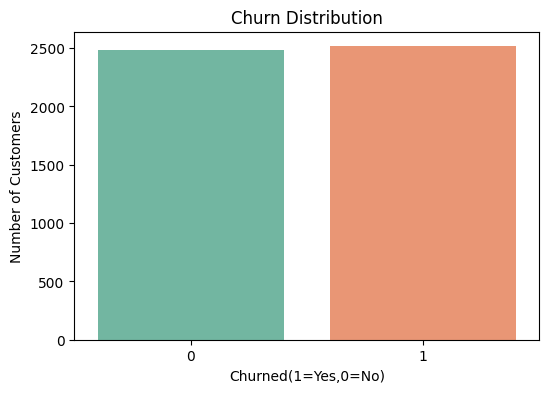

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churned', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churned(1=Yes,0=No)')
plt.ylabel('Number of Customers')
plt.show()


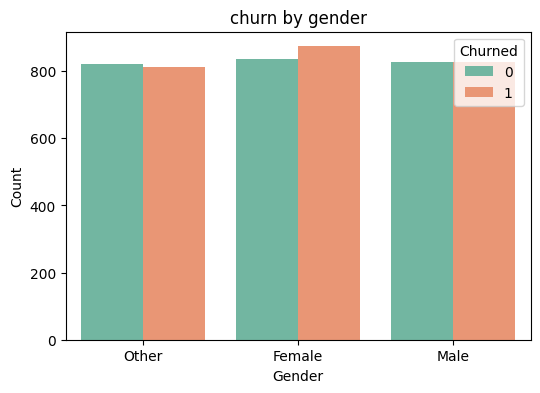

In [ ]:


plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='churned' ,data=df, palette='Set2')
plt.title('churn by gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churned')
plt.show()

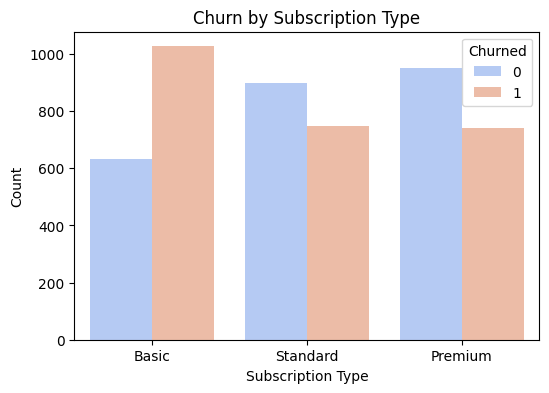

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='subscription_type', hue='churned', data=df, palette='coolwarm')
plt.title('Churn by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.legend(title='Churned')
plt.show()

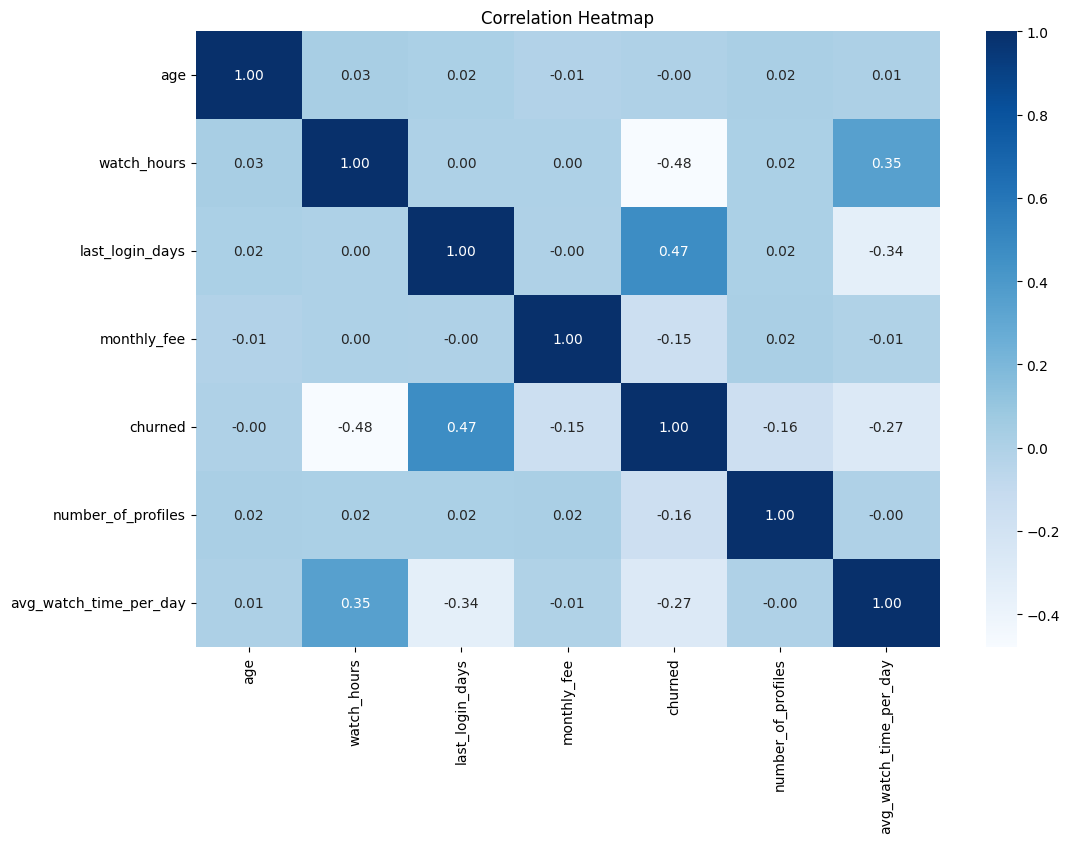

In [ ]:
#correlation Heatmap
numeric_df= df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True,fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#feauture engineering

#one hot encode all categorical columns

df=pd.get_dummies(df, columns=['subscription_type', 'region', 'device','payment_method', 'favorite_genre'], drop_first=True)

x=df.drop(['churned','customer_id'], axis=1)
y=df['churned']
x = x.select_dtypes(include=[np.number])




In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#train
log_reg= LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train_scaled, y_train)

#predict
y_pred_lr= log_reg.predict(x_test_scaled)
y_prob_lr=log_reg.predict_proba(x_test_scaled)[:,1] #probabilities

#evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC score:")
print(roc_auc_score(y_test, y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       497
           1       0.85      0.89      0.87       503

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000

ROC-AUC score:
0.865827169778112


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

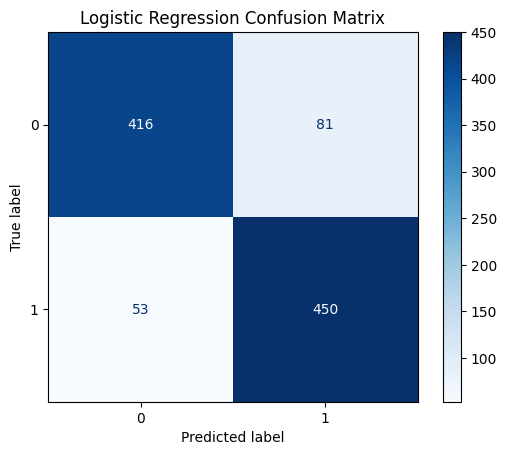

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred_lr)
#plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")

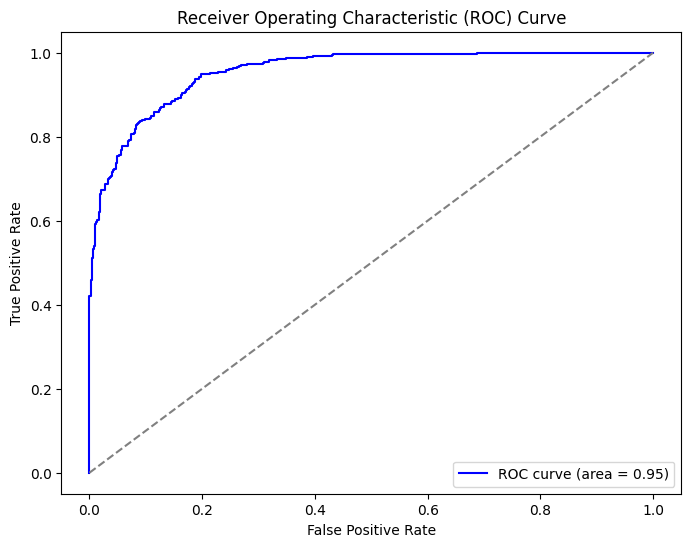

In [ ]:
from sklearn.metrics import roc_curve, auc
#roc curve
fpr, tpr, thresholds= roc_curve(y_test, y_prob_lr)
roc_auc=auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       497
           1       0.95      0.92      0.94       503

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

ROC-AUC score:
0.9893516166581997


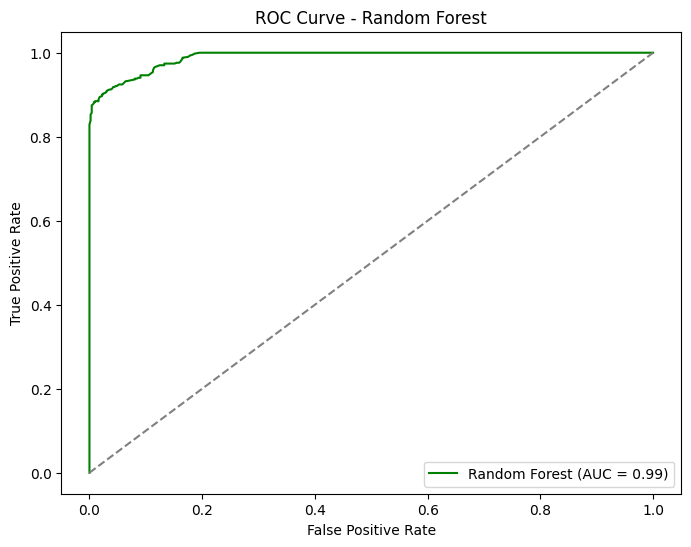

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#train
rf_clf= RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(x_train_scaled, y_train)

#predict
y_pred_rf=rf_clf.predict(x_test_scaled)
y_prob_rf=rf_clf.predict_proba(x_test_scaled)[:,1]

#evaluation
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC score:")
print(roc_auc_score(y_test, y_prob_rf))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


In [ ]:
#gradient boosting

import xgboost as xgb

#train
xgb_clf=xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss')
xgb_clf.fit(x_train_scaled, y_train)

#predict
y_pred_xgb=xgb_clf.predict(x_test_scaled)
y_prob_xgb=xgb_clf.predict_proba(x_test_scaled)[:,1]

#evaluation
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

XGBoost:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       497
           1       0.94      0.93      0.93       503

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

ROC-AUC Score: 0.9901756463232676


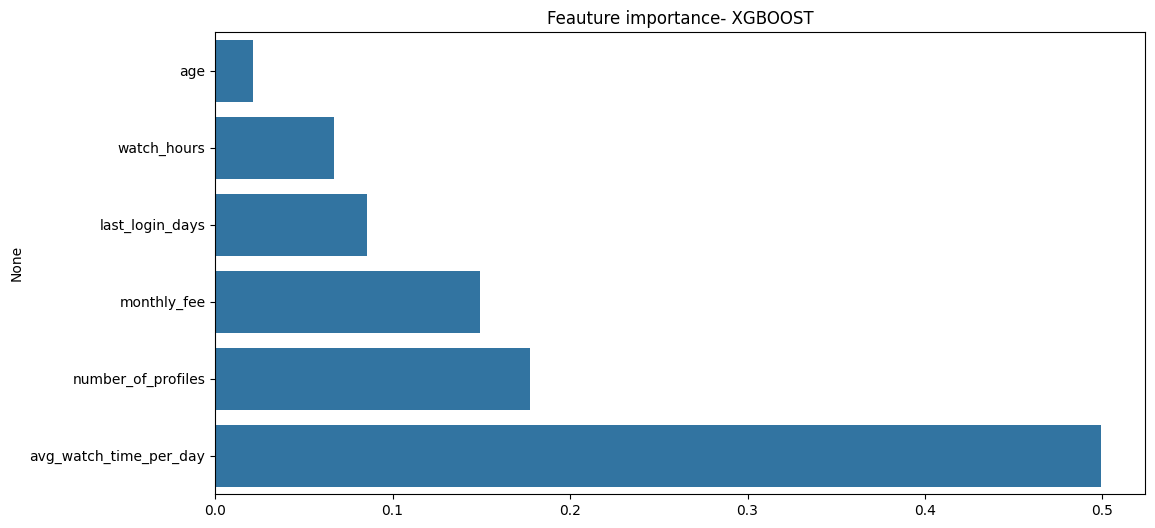

In [ ]:
#feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = xgb_clf.feature_importances_
features = x_train.columns

plt.figure(figsize=(12,6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feauture importance- XGBOOST')
plt.show()

                 Model  Accuracy  Precision    Recall  F1 Score  ROC-AUC
0  Logistic Regression     0.866   0.847458  0.894632  0.870406  0.95495
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression     0.866   0.847458  0.894632  0.870406  0.954950
1        Random Forest     0.936   0.948875  0.922465  0.935484  0.989352
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression     0.866   0.847458  0.894632  0.870406  0.954950
1        Random Forest     0.936   0.948875  0.922465  0.935484  0.989352
2              XGBoost     0.933   0.939516  0.926441  0.932933  0.990176


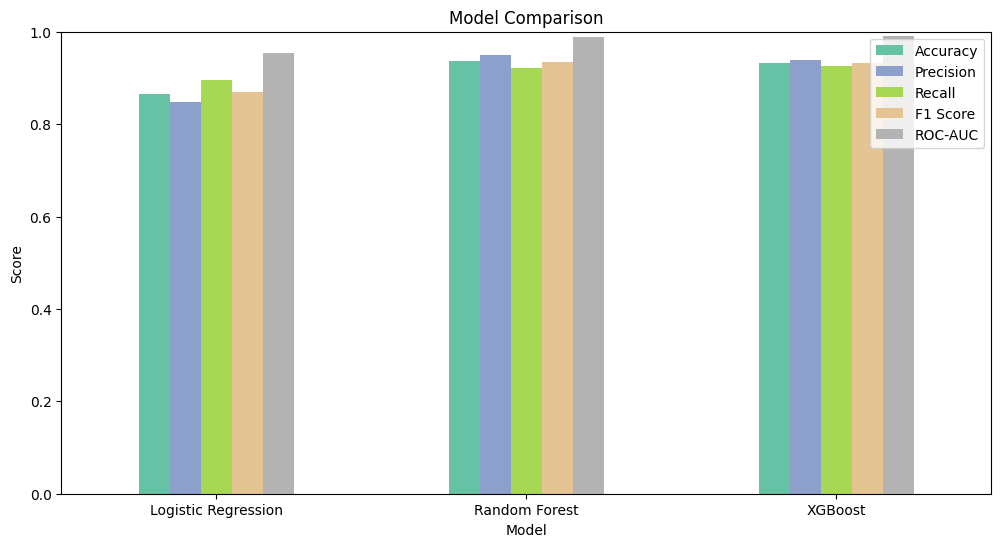

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models=['Logistic Regression', 'Random Forest', 'XGBoost']

#store predictions
predictions=[y_pred_lr, y_pred_rf, y_pred_xgb]
probabilities=[y_prob_lr, y_prob_rf, y_prob_xgb]

results=[]

for model, y_pred, y_prob in zip(models, predictions, probabilities):
  acc=accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  auc= roc_auc_score(y_test, y_prob)

  results.append({'Model': model,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': auc})

  comparison_df= pd.DataFrame(results)
  print(comparison_df)

#bar plot
comparison_df.set_index('Model', inplace=True)
comparison_df.plot(kind='bar', figsize=(12,6), colormap='Set2')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()


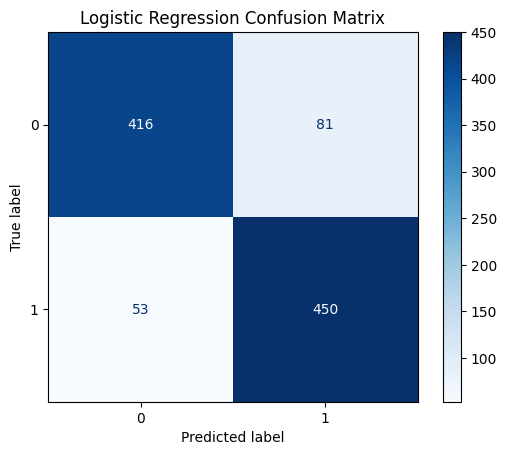

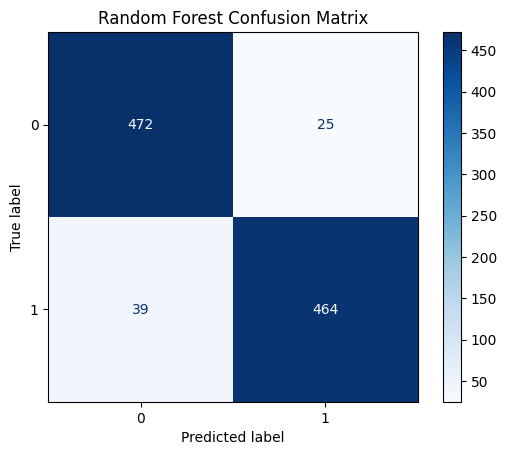

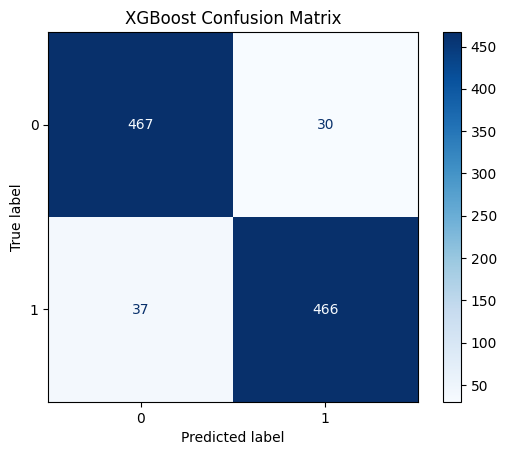

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model_name, y_pred in zip(models, predictions):
  cm=confusion_matrix(y_test, y_pred)
  disp=ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title(f'{model_name} Confusion Matrix')
  plt.show()